In [1]:
import os
import shutil
# from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [9]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Define the paths for the dataset
dataset_dir = r"E:\PythonWithML\MendelyDatasetNewSplit\Dry Fruit Image Dataset"

# List of subcategories for each type of dry fruit
categories = {
    "ALMOND": ["ALMOND_MAMRA", "ALMOND_REGULAR", "ALMOND_SANORA"],
    "CASHEW": ["CASHEW_JUMBO", "CASHEW_REGULAR", "CASHEW_SPECIAL"],
    "FIG": ["FIG_JUMBO", "FIG_MEDIUM", "FIG_SMALL"],
    "RAISIN": ["RAISIN_BLACK", "RAISIN_GRADE1", "RAISIN_PREMIUM"]
}

# Paths for the train, validation, and test directories
train_dir = r'E:\PythonWithML\MendelyDatasetNewSplit\ShuffleNetV2_70_20_10\train'
val_dir = r'E:\PythonWithML\MendelyDatasetNewSplit\ShuffleNetV2_70_20_10\val'
test_dir = r'E:\PythonWithML\MendelyDatasetNewSplit\ShuffleNetV2_70_20_10\test'

# Function to split dataset
def split_dataset(dataset_dir, train_dir, val_dir, test_dir, categories, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    # Create directories for train, val, and test if they don't exist
    for dir_path in [train_dir, val_dir, test_dir]:
        os.makedirs(dir_path, exist_ok=True)
    
    # Loop through each main category and its subcategories
    for main_category, subcategories in categories.items():
        for subcategory in subcategories:
            subcategory_dir = os.path.join(dataset_dir, main_category, subcategory)
            
            if os.path.isdir(subcategory_dir):
                print(f"Processing subcategory: {subcategory}")
                images = os.listdir(subcategory_dir)
                images = [img for img in images if img.endswith(('.png', '.jpg', '.jpeg'))]
                
                if not images:
                    print(f"No images found in {subcategory_dir}. Skipping...")
                    continue
                
                # Split images into train, val, and test sets
                train_images, temp_images = train_test_split(images, train_size=train_ratio, random_state=42)
                val_images, test_images = train_test_split(temp_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

                # Function to move the images
                def move_images(image_list, folder_name):
                    class_folder = os.path.join(folder_name, subcategory)
                    os.makedirs(class_folder, exist_ok=True)
                    
                    for img in image_list:
                        src = os.path.join(subcategory_dir, img)
                        dst = os.path.join(class_folder, img)
                        shutil.copy(src, dst)

                # Move the images to respective folders
                move_images(train_images, train_dir)
                move_images(val_images, val_dir)
                move_images(test_images, test_dir)
                
                print(f"Moved {len(train_images)} train images, {len(val_images)} val images, and {len(test_images)} test images for {subcategory}")

# Split the dataset
split_dataset(dataset_dir, train_dir, val_dir, test_dir, categories)


Processing subcategory: ALMOND_MAMRA
Moved 672 train images, 192 val images, and 96 test images for ALMOND_MAMRA
Processing subcategory: ALMOND_REGULAR
Moved 672 train images, 192 val images, and 96 test images for ALMOND_REGULAR
Processing subcategory: ALMOND_SANORA
Moved 672 train images, 192 val images, and 96 test images for ALMOND_SANORA
Processing subcategory: CASHEW_JUMBO
Moved 672 train images, 192 val images, and 96 test images for CASHEW_JUMBO
Processing subcategory: CASHEW_REGULAR
Moved 672 train images, 192 val images, and 96 test images for CASHEW_REGULAR
Processing subcategory: CASHEW_SPECIAL
Moved 672 train images, 192 val images, and 96 test images for CASHEW_SPECIAL
Processing subcategory: FIG_JUMBO
Moved 672 train images, 192 val images, and 96 test images for FIG_JUMBO
Processing subcategory: FIG_MEDIUM
Moved 672 train images, 192 val images, and 96 test images for FIG_MEDIUM
Processing subcategory: FIG_SMALL
Moved 672 train images, 192 val images, and 96 test images

In [11]:
import os
from sklearn.model_selection import train_test_split
import shutil
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Paths for the train, validation, and test directories
train_dir = r'E:\PythonWithML\MendelyDatasetNewSplit\ShuffleNetV2_70_20_10\train'
val_dir = r'E:\PythonWithML\MendelyDatasetNewSplit\ShuffleNetV2_70_20_10\val'
test_dir = r'E:\PythonWithML\MendelyDatasetNewSplit\ShuffleNetV2_70_20_10\test'

# Define transformations for training, validation, and testing datasets
# train_transforms = transforms.Compose([
#     transforms.RandomResizedCrop(224),
#     transforms.RandomRotation(20),  # Consider reducing aggressive rotations
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomAffine(degrees=0, shear=0.1, scale=(0.9, 1.1)),  # Lighter affine transformation
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomRotation(20),  # Consider reducing aggressive rotations
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, shear=0.1, scale=(0.9, 1.1)),  # Lighter affine transformation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# val_test_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])
val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transforms)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=True)


In [14]:
import torch
from torch import nn

num_classes = 12  # Number of classes in the dataset

# Load pre-trained ShuffleNetV2 model
model = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=True)

# Access the input features of the classifier layer
num_features = model.fc.in_features  # Get the number of input features for the last layer

# Modify the classifier to fit the number of output classes
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(num_features, num_classes)  # Adjust to the number of classes
)




Using cache found in C:\Users\Administrator/.cache\torch\hub\pytorch_vision_v0.10.0


In [15]:
model


ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_

In [ ]:
# # without earky stopping
# import torch
# from torch import nn, optim
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# # Loss function and optimizer
# criterion = nn.CrossEntropyLoss()  # For multi-class classification
# optimizer = optim.Adam(model.parameters(), lr=0.0001)

# # Move the model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Training on: {device}")
# model.to(device)

# # Training loop
# num_epochs = 50  # Set your desired number of epochs

# # For tracking accuracy and loss
# train_acc_history = []
# val_acc_history = []
# train_loss_history = []
# val_loss_history = []

# best_accuracy = 0

# for epoch in range(num_epochs):
#     model.train()  # Set the model to training mode
#     running_loss = 0.0
#     correct_train = 0
#     total_train = 0

#     # Use tqdm for tracking batches inside the epoch
#     progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    
#     for images, labels in progress_bar:
#         # Move data to GPU if available
#         images, labels = images.to(device), labels.to(device)
        
#         # Zero the parameter gradients
#         optimizer.zero_grad()
        
#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, labels)
        
#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()
        
#         # Accumulate loss
#         running_loss += loss.item()
        
#         # Predictions and accuracy calculation
#         _, predicted = torch.max(outputs, 1)
#         total_train += labels.size(0)
#         correct_train += (predicted == labels).sum().item()
        
#         # Update the progress bar description with current loss
#         progress_bar.set_postfix(loss=running_loss/len(train_loader))
    
#     # Calculate training accuracy and loss
#     train_loss = running_loss / len(train_loader)
#     train_accuracy = 100 * correct_train / total_train
    
#     # Append for later plotting
#     train_acc_history.append(train_accuracy)
#     train_loss_history.append(train_loss)

#     # Validation phase
#     model.eval()  # Set the model to evaluation mode
#     correct_val = 0
#     total_val = 0
#     running_val_loss = 0.0
    
#     with torch.no_grad():
#         for images, labels in val_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             val_loss = criterion(outputs, labels)
#             running_val_loss += val_loss.item()
            
#             _, predicted = torch.max(outputs, 1)
#             total_val += labels.size(0)
#             correct_val += (predicted == labels).sum().item()
    
#     # Calculate validation accuracy and loss
#     val_loss = running_val_loss / len(val_loader)
#     val_accuracy = 100 * correct_val / total_val
    
#     # Append for later plotting
#     val_acc_history.append(val_accuracy)
#     val_loss_history.append(val_loss)
    
#     # Print epoch statistics
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}% | '
#           f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

#     # Save the best model
#     if val_accuracy > best_accuracy:
#         torch.save(model.state_dict(), f"best_model_epoch_{epoch+1}_val_acc_{val_accuracy:.2f}.pth")
#         print(f"Best model saved with validation accuracy: {val_accuracy:.2f}% at epoch {epoch+1}")
#         best_accuracy = val_accuracy

# # Plot training and validation accuracy
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(train_acc_history, label='Train Accuracy')
# plt.plot(val_acc_history, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# # Plot training and validation loss
# plt.subplot(1, 2, 2)
# plt.plot(train_loss_history, label='Train Loss')
# plt.plot(val_loss_history, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

Training on: cpu


Epoch 1/50: 100%|████████████████████████████████████| 252/252 [05:32<00:00,  1.32s/it, loss=2.19]


Epoch [1/50], Loss: 2.1944, Accuracy: 38.64% | Val Loss: 1.5856, Val Accuracy: 44.53%
Best model saved with validation accuracy: 44.53% at epoch 1


Epoch 2/50: 100%|████████████████████████████████████| 252/252 [04:44<00:00,  1.13s/it, loss=1.32]


Epoch [2/50], Loss: 1.3168, Accuracy: 51.57% | Val Loss: 0.9953, Val Accuracy: 63.93%
Best model saved with validation accuracy: 63.93% at epoch 2


Epoch 3/50: 100%|███████████████████████████████████| 252/252 [04:38<00:00,  1.10s/it, loss=0.897]


Epoch [3/50], Loss: 0.8966, Accuracy: 64.38% | Val Loss: 0.6912, Val Accuracy: 68.75%
Best model saved with validation accuracy: 68.75% at epoch 3


Epoch 4/50: 100%|███████████████████████████████████| 252/252 [04:40<00:00,  1.11s/it, loss=0.711]


Epoch [4/50], Loss: 0.7107, Accuracy: 70.28% | Val Loss: 0.5578, Val Accuracy: 78.73%
Best model saved with validation accuracy: 78.73% at epoch 4


Epoch 5/50: 100%|███████████████████████████████████| 252/252 [04:39<00:00,  1.11s/it, loss=0.599]


Epoch [5/50], Loss: 0.5988, Accuracy: 76.14% | Val Loss: 0.4688, Val Accuracy: 81.08%
Best model saved with validation accuracy: 81.08% at epoch 5


Epoch 6/50: 100%|███████████████████████████████████| 252/252 [04:40<00:00,  1.11s/it, loss=0.482]


Epoch [6/50], Loss: 0.4824, Accuracy: 82.91% | Val Loss: 0.3314, Val Accuracy: 88.59%
Best model saved with validation accuracy: 88.59% at epoch 6


Epoch 7/50: 100%|███████████████████████████████████| 252/252 [04:38<00:00,  1.11s/it, loss=0.394]


Epoch [7/50], Loss: 0.3945, Accuracy: 86.22% | Val Loss: 0.2510, Val Accuracy: 92.01%
Best model saved with validation accuracy: 92.01% at epoch 7


Epoch 8/50: 100%|███████████████████████████████████| 252/252 [04:51<00:00,  1.16s/it, loss=0.315]


Epoch [8/50], Loss: 0.3150, Accuracy: 89.09% | Val Loss: 0.2058, Val Accuracy: 93.23%
Best model saved with validation accuracy: 93.23% at epoch 8


Epoch 9/50: 100%|███████████████████████████████████| 252/252 [04:37<00:00,  1.10s/it, loss=0.263]


Epoch [9/50], Loss: 0.2629, Accuracy: 91.83% | Val Loss: 0.1578, Val Accuracy: 94.88%
Best model saved with validation accuracy: 94.88% at epoch 9


Epoch 10/50: 100%|███████████████████████████████████| 252/252 [04:35<00:00,  1.09s/it, loss=0.21]


Epoch [10/50], Loss: 0.2102, Accuracy: 93.35% | Val Loss: 0.1221, Val Accuracy: 96.27%
Best model saved with validation accuracy: 96.27% at epoch 10


Epoch 11/50: 100%|██████████████████████████████████| 252/252 [04:33<00:00,  1.09s/it, loss=0.184]


Epoch [11/50], Loss: 0.1837, Accuracy: 94.20% | Val Loss: 0.1107, Val Accuracy: 96.31%
Best model saved with validation accuracy: 96.31% at epoch 11


Epoch 12/50: 100%|██████████████████████████████████| 252/252 [04:32<00:00,  1.08s/it, loss=0.154]


Epoch [12/50], Loss: 0.1539, Accuracy: 95.03% | Val Loss: 0.0809, Val Accuracy: 97.27%
Best model saved with validation accuracy: 97.27% at epoch 12


Epoch 13/50: 100%|██████████████████████████████████| 252/252 [04:34<00:00,  1.09s/it, loss=0.135]


Epoch [13/50], Loss: 0.1352, Accuracy: 95.60% | Val Loss: 0.0779, Val Accuracy: 97.40%
Best model saved with validation accuracy: 97.40% at epoch 13


Epoch 14/50: 100%|██████████████████████████████████| 252/252 [04:32<00:00,  1.08s/it, loss=0.124]


Epoch [14/50], Loss: 0.1241, Accuracy: 96.02% | Val Loss: 0.0709, Val Accuracy: 97.53%
Best model saved with validation accuracy: 97.53% at epoch 14


Epoch 15/50: 100%|██████████████████████████████████| 252/252 [04:36<00:00,  1.10s/it, loss=0.111]


Epoch [15/50], Loss: 0.1113, Accuracy: 96.50% | Val Loss: 0.0603, Val Accuracy: 98.05%
Best model saved with validation accuracy: 98.05% at epoch 15


Epoch 16/50: 100%|██████████████████████████████████| 252/252 [04:36<00:00,  1.10s/it, loss=0.104]


Epoch [16/50], Loss: 0.1044, Accuracy: 96.96% | Val Loss: 0.0512, Val Accuracy: 98.31%
Best model saved with validation accuracy: 98.31% at epoch 16


Epoch 17/50: 100%|█████████████████████████████████| 252/252 [04:37<00:00,  1.10s/it, loss=0.0971]


Epoch [17/50], Loss: 0.0971, Accuracy: 96.58% | Val Loss: 0.0462, Val Accuracy: 98.35%
Best model saved with validation accuracy: 98.35% at epoch 17


Epoch 18/50: 100%|█████████████████████████████████| 252/252 [04:35<00:00,  1.09s/it, loss=0.0793]


Epoch [18/50], Loss: 0.0793, Accuracy: 97.66% | Val Loss: 0.0471, Val Accuracy: 98.65%
Best model saved with validation accuracy: 98.65% at epoch 18


Epoch 19/50: 100%|█████████████████████████████████| 252/252 [04:35<00:00,  1.09s/it, loss=0.0792]


Epoch [19/50], Loss: 0.0792, Accuracy: 97.53% | Val Loss: 0.0372, Val Accuracy: 98.74%
Best model saved with validation accuracy: 98.74% at epoch 19


Epoch 20/50: 100%|█████████████████████████████████| 252/252 [04:34<00:00,  1.09s/it, loss=0.0741]


Epoch [20/50], Loss: 0.0741, Accuracy: 97.63% | Val Loss: 0.0382, Val Accuracy: 98.70%


Epoch 21/50: 100%|█████████████████████████████████| 252/252 [04:36<00:00,  1.10s/it, loss=0.0552]


Epoch [21/50], Loss: 0.0552, Accuracy: 98.38% | Val Loss: 0.0237, Val Accuracy: 99.31%
Best model saved with validation accuracy: 99.31% at epoch 21


Epoch 22/50: 100%|█████████████████████████████████| 252/252 [04:36<00:00,  1.10s/it, loss=0.0624]


Epoch [22/50], Loss: 0.0624, Accuracy: 98.04% | Val Loss: 0.0461, Val Accuracy: 98.65%


Epoch 23/50: 100%|█████████████████████████████████| 252/252 [04:37<00:00,  1.10s/it, loss=0.0565]


Epoch [23/50], Loss: 0.0565, Accuracy: 98.25% | Val Loss: 0.0306, Val Accuracy: 98.91%


Epoch 24/50: 100%|█████████████████████████████████| 252/252 [04:36<00:00,  1.10s/it, loss=0.0544]


Epoch [24/50], Loss: 0.0544, Accuracy: 98.29% | Val Loss: 0.0339, Val Accuracy: 98.61%


Epoch 25/50: 100%|█████████████████████████████████| 252/252 [04:38<00:00,  1.11s/it, loss=0.0524]


Epoch [25/50], Loss: 0.0524, Accuracy: 98.38% | Val Loss: 0.0242, Val Accuracy: 99.18%


Epoch 26/50: 100%|█████████████████████████████████| 252/252 [04:31<00:00,  1.08s/it, loss=0.0449]


Epoch [26/50], Loss: 0.0449, Accuracy: 98.67% | Val Loss: 0.0163, Val Accuracy: 99.65%
Best model saved with validation accuracy: 99.65% at epoch 26


Epoch 27/50: 100%|█████████████████████████████████| 252/252 [04:32<00:00,  1.08s/it, loss=0.0488]


Epoch [27/50], Loss: 0.0488, Accuracy: 98.31% | Val Loss: 0.0234, Val Accuracy: 99.26%


Epoch 28/50: 100%|█████████████████████████████████| 252/252 [04:33<00:00,  1.08s/it, loss=0.0444]


Epoch [28/50], Loss: 0.0444, Accuracy: 98.56% | Val Loss: 0.0316, Val Accuracy: 98.87%


Epoch 29/50: 100%|█████████████████████████████████| 252/252 [04:32<00:00,  1.08s/it, loss=0.0388]


Epoch [29/50], Loss: 0.0388, Accuracy: 98.64% | Val Loss: 0.0153, Val Accuracy: 99.57%


Epoch 30/50: 100%|█████████████████████████████████| 252/252 [04:31<00:00,  1.08s/it, loss=0.0416]


Epoch [30/50], Loss: 0.0416, Accuracy: 98.66% | Val Loss: 0.0199, Val Accuracy: 99.39%


Epoch 31/50: 100%|█████████████████████████████████| 252/252 [04:33<00:00,  1.09s/it, loss=0.0388]


Epoch [31/50], Loss: 0.0388, Accuracy: 98.93% | Val Loss: 0.0103, Val Accuracy: 99.70%
Best model saved with validation accuracy: 99.70% at epoch 31


Epoch 32/50: 100%|█████████████████████████████████| 252/252 [04:31<00:00,  1.08s/it, loss=0.0329]


Epoch [32/50], Loss: 0.0329, Accuracy: 98.83% | Val Loss: 0.0177, Val Accuracy: 99.31%


Epoch 33/50: 100%|█████████████████████████████████| 252/252 [04:34<00:00,  1.09s/it, loss=0.0323]


Epoch [33/50], Loss: 0.0323, Accuracy: 99.13% | Val Loss: 0.0172, Val Accuracy: 99.61%


Epoch 34/50: 100%|█████████████████████████████████| 252/252 [04:32<00:00,  1.08s/it, loss=0.0316]


Epoch [34/50], Loss: 0.0316, Accuracy: 98.91% | Val Loss: 0.0079, Val Accuracy: 99.78%
Best model saved with validation accuracy: 99.78% at epoch 34


Epoch 35/50: 100%|█████████████████████████████████| 252/252 [04:32<00:00,  1.08s/it, loss=0.0281]


Epoch [35/50], Loss: 0.0281, Accuracy: 99.14% | Val Loss: 0.0178, Val Accuracy: 99.44%


Epoch 36/50: 100%|█████████████████████████████████| 252/252 [04:32<00:00,  1.08s/it, loss=0.0327]


Epoch [36/50], Loss: 0.0327, Accuracy: 99.02% | Val Loss: 0.0259, Val Accuracy: 99.26%


Epoch 37/50: 100%|█████████████████████████████████| 252/252 [04:32<00:00,  1.08s/it, loss=0.0308]


Epoch [37/50], Loss: 0.0308, Accuracy: 99.02% | Val Loss: 0.0213, Val Accuracy: 99.39%


Epoch 38/50: 100%|█████████████████████████████████| 252/252 [04:31<00:00,  1.08s/it, loss=0.0266]


Epoch [38/50], Loss: 0.0266, Accuracy: 99.13% | Val Loss: 0.0121, Val Accuracy: 99.70%


Epoch 39/50: 100%|█████████████████████████████████| 252/252 [04:32<00:00,  1.08s/it, loss=0.0366]


Epoch [39/50], Loss: 0.0366, Accuracy: 98.87% | Val Loss: 0.0286, Val Accuracy: 99.13%
Early stopping triggered after 39 epochs!


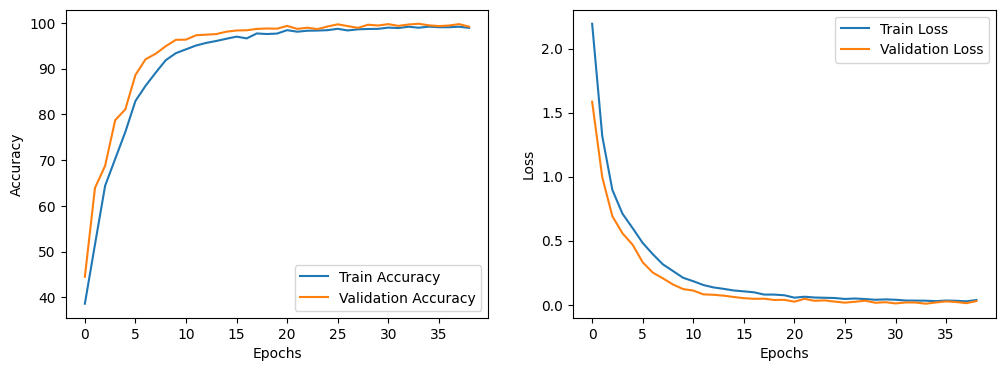

In [16]:
# Training Validation With early stopping
import torch
from torch import nn, optim
from tqdm import tqdm
import matplotlib.pyplot as plt

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on: {device}")
model.to(device)

# Set up early stopping parameters
patience = 5  # Stop training if the validation accuracy doesn't improve after 5 epochs
early_stop_counter = 0  # Counts how many epochs have passed without improvement

# Training loop
num_epochs = 50  # Set your desired number of epochs

# For tracking accuracy and loss
train_acc_history = []
val_acc_history = []
train_loss_history = []
val_loss_history = []

best_accuracy = 0

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Use tqdm for tracking batches inside the epoch
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    
    for images, labels in progress_bar:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
        
        # Predictions and accuracy calculation
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        
        # Update the progress bar description with current loss
        progress_bar.set_postfix(loss=running_loss/len(train_loader))
    
    # Calculate training accuracy and loss
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    
    # Append for later plotting
    train_acc_history.append(train_accuracy)
    train_loss_history.append(train_loss)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0
    running_val_loss = 0.0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    # Calculate validation accuracy and loss
    val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    
    # Append for later plotting
    val_acc_history.append(val_accuracy)
    val_loss_history.append(val_loss)
    
    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}% | '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    # Check for early stopping
    if val_accuracy > best_accuracy:
        torch.save(model.state_dict(), f"best_model_epoch_{epoch+1}_val_acc_{val_accuracy:.2f}.pth")
        print(f"Best model saved with validation accuracy: {val_accuracy:.2f}% at epoch {epoch+1}")
        best_accuracy = val_accuracy
        early_stop_counter = 0  # Reset counter since we have an improvement
    else:
        early_stop_counter += 1  # No improvement, increment the counter
        
        if early_stop_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs!")
            break  # Exit the training loop if no improvement for 'patience' epochs

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [17]:
# Import the time module
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the same transformations as used for validation/test
val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Paths for the test directory

test_dir = r'E:\PythonWithML\MendelyDatasetNewSplit\ShuffleNetV2_70_20_10\test'

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transforms)

# Create the test data loader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=True)

# Print the size of the test dataset
print(f"Test dataset has {len(test_dataset)} samples.")

Test dataset has 1152 samples.


In [18]:
import time
import torch

# Function to test the model on the test dataset
def test_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    correct_test = 0
    total_test = 0

    start_time = time.time()  # Start the timer
    
    with torch.no_grad():  # No need to compute gradients for testing
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to the appropriate device
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()  # Compare predictions with true labels
    
    test_accuracy = 100 * correct_test / total_test  # Calculate accuracy
    end_time = time.time()  # End the timer
    
    # Calculate execution time
    execution_time = end_time - start_time
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Execution Time: {execution_time:.2f} seconds")  # Print the execution time
    
    return test_accuracy

# Load the best saved ShuffleNet model
best_model_path = r"E:\PythonWithML\MendelyDatasetNewSplit\ShuffleNetV2_70_20_10\best_model_epoch_34_val_acc_99.78.pth"  # Replace this with your actual best model path
model.load_state_dict(torch.load(best_model_path))
model.to(device)

# Test the model on the test dataset
print("Testing the best model on the test set...")
test_model(model, test_loader, device)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17532\4070211760.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Testing the best model on the test set...
Test Accuracy: 99.48%
Execution Time: 20.56 seconds


99.47916666666667

In [21]:
import time
import torch

# Define the device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Function to test the model on the test dataset
def test_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    correct_test = 0
    total_test = 0

    start_time = time.time()  # Start the timer
    
    with torch.no_grad():  # No need to compute gradients for testing
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to the appropriate device
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()  # Compare predictions with true labels
    
    test_accuracy = 100 * correct_test / total_test  # Calculate accuracy
    end_time = time.time()  # End the timer
    
    # Calculate execution time
    execution_time = end_time - start_time
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Execution Time: {execution_time:.2f} seconds")  # Print the execution time
    
    return test_accuracy

# Load the best saved ShuffleNet model
best_model_path = r"E:\PythonWithML\demo\ShuffleNet\Run 4 Transform1 V2\best_model_epoch_19_val_acc_99.05.pth"  # Replace this with your actual best model path
model.load_state_dict(torch.load(best_model_path))
model.to(device)

# Test the model on the test dataset
print("Testing the best model on the test set...")
test_model(model, test_loader, device)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_27024\2099552228.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Testing the best model on the test set...
Test Accuracy: 99.26%
Execution Time: 37.88 seconds


99.26215277777777

In [20]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Displaying the confusion matrix for the test set...


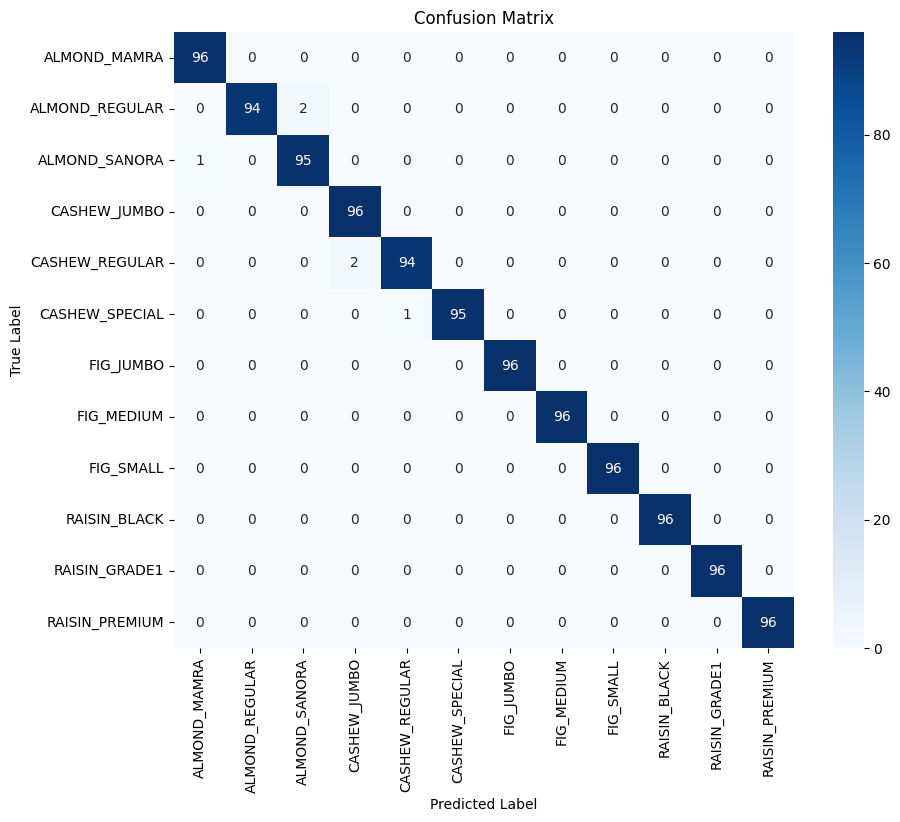

In [21]:
# Function to display confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def display_confusion_matrix(model, test_loader, device, class_names):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    # Collect predictions and labels
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            # Store predictions and true labels for confusion matrix
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Class names for your dry fruits dataset
class_names = ['ALMOND_MAMRA', 'ALMOND_REGULAR', 'ALMOND_SANORA', 
               'CASHEW_JUMBO', 'CASHEW_REGULAR', 'CASHEW_SPECIAL',
               'FIG_JUMBO', 'FIG_MEDIUM', 'FIG_SMALL', 
               'RAISIN_BLACK', 'RAISIN_GRADE1', 'RAISIN_PREMIUM']

# Test the model and display the confusion matrix
print("Displaying the confusion matrix for the test set...")
display_confusion_matrix(model, test_loader, device, class_names)
